In [1]:
import numpy as np

csv_path = "mtfuji_data.csv"

np.set_printoptions(suppress=True) # Set prohibition of scientific notation
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)



print(fuji[130:140])

[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


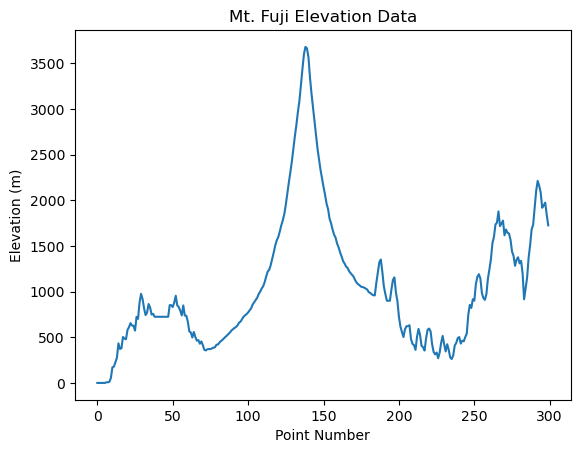

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = np.loadtxt('mtfuji_data.csv', delimiter=',', skiprows=1)

# Extract the elevation data
elevation = data[:, 3]

# Create a plot of the elevation data
plt.plot(elevation)

# Set the plot title and axis labels
plt.title('Mt. Fuji Elevation Data')
plt.xlabel('Point Number')
plt.ylabel('Elevation (m)')

# Show the plot
plt.show()


In [18]:
def calculate_slope(position, elevation, current_point):
  : Slope of the current point.
    """
    next_point = current_point + 1
    if next_point == len(position):
        next_point = current_point
    slope = (elevation[next_point] - elevation[current_point]) / (position[next_point] - position[current_point])
    return slope


In [19]:
def get_destination_point(current_point, alpha, slope):
    destination_point = current_point - alpha * slope
    destination_point = round(destination_point)
    if destination_point < 0 or destination_point >= fuji.shape[0]:
        destination_point = current_point
    return destination_point


In [20]:
def descend_mountain(alpha=0.2):
    current_point = 136
    points = [current_point]
    while True:
        slope = calculate_slope(current_point)
        destination = current_point - alpha * slope
        destination = round(destination).astype(int)
        if destination == current_point:
            break
        if destination < 0 or destination >= len(fuji):
            break
        current_point = destination
        points.append(current_point)
    return points


In [22]:
def descend_mountain(start_point, data, alpha=0.2):
    current_point = (start_point, data[start_point])
    points = [current_point]

    while True:
        # Get slope at current point
        slope = calculate_slope(current_point[0], data)

        # Calculate destination point
        destination_x = current_point[0] - alpha * slope
        destination_x = int(round(destination_x))  # Convert to integer
        if destination_x < 0 or destination_x >= len(data):  # Check if within bounds
            break
        destination_y = data[destination_x]
        destination_point = (destination_x, destination_y)
        points.append(destination_point)

        # Check if reached end of mountain
        if destination_x == current_point[0]:
            break

        # Update current point
        current_point = destination_point

    return points


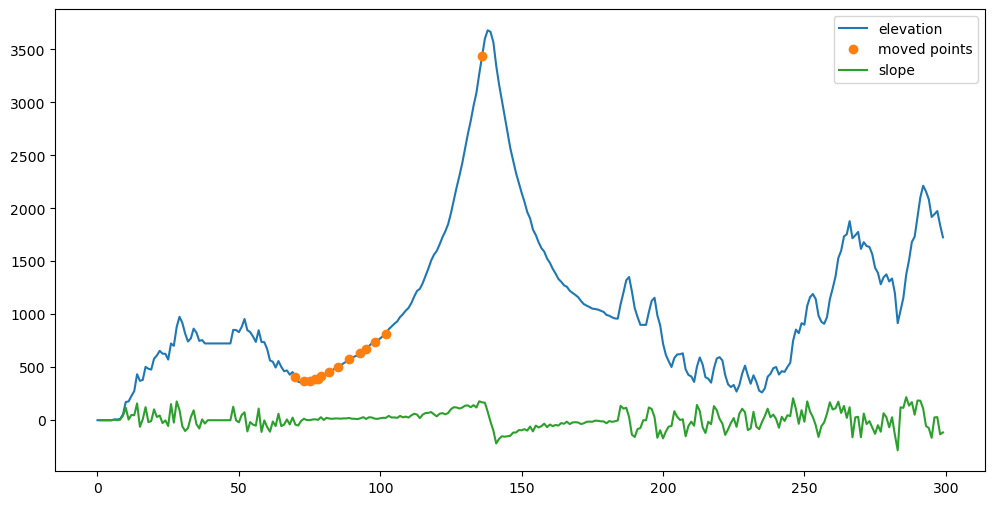

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_slope(point_num, elevation):
    slope = elevation[point_num] - elevation[point_num - 1]
    return slope

def calculate_destination(point_num, elevation, alpha):
    destination = point_num - alpha * calculate_slope(point_num, elevation)
    return int(round(destination))

def descend_mountain(elevation, alpha=0.2):
    current_point = 136
    points_list = [current_point]
    while True:
        destination_point = calculate_destination(current_point, elevation, alpha)
        if destination_point == current_point:
            break
        points_list.append(destination_point)
        current_point = destination_point
    return points_list

# Load the elevation data from the CSV file
csv_path = "mtfuji_data.csv"
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

# Descend the mountain and plot the result
points_list = descend_mountain(fuji[:, 3])
x = np.arange(len(fuji[:, 3]))
plt.figure(figsize=(12,6))
plt.plot(x, fuji[:, 3], label="elevation")
plt.plot(points_list, fuji[points_list, 3], 'o', label="moved points")
plt.plot(x[1:], np.diff(fuji[:, 3]) / np.diff(x), label="slope")
plt.legend()
plt.show()


TypeError: unsupported operand type(s) for -: 'list' and 'int'

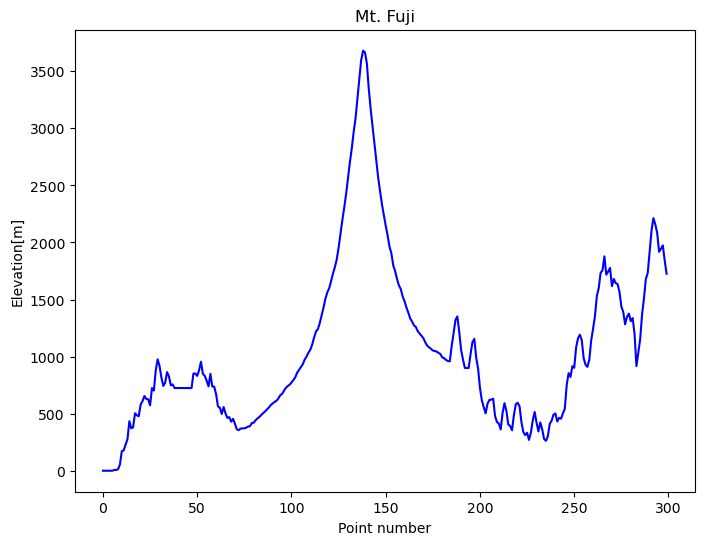

In [29]:
import numpy as np
import matplotlib.pyplot as plt


# Load Mt. Fuji data
data = np.loadtxt("mtfuji_data.csv", delimiter=",", skiprows=1)

# Function to calculate the slope of a point
def get_slope(data, point_num):
    x = point_num - 1
    y = data[point_num - 1][3] - data[point_num - 2][3]
    return y / x

# Function to calculate the next destination point
def get_destination(data, current_point, alpha):
    slope = get_slope(data, current_point)
    next_point = current_point - alpha * slope
    next_point = round(next_point)
    if next_point < 1 or next_point >= len(data):
        return current_point
    else:
        return next_point

# Function to go down the mountain

def go_down_mountain(data, alpha, start_point):
    current_point = start_point
    points = [current_point]
    while True:
        next_point = get_destination(data, current_point, alpha)
        if next_point == current_point:
            break
        points.append(next_point)
        current_point = next_point
    return points

# Run the function with different initial values
points1 = go_down_mountain(data, 0.2, 136)
points2 = go_down_mountain(data, 0.2, 200)

# Plot the section view
plt.figure(figsize=(8, 6))
plt.title("Mt. Fuji")
plt.xlabel("Point number")
plt.ylabel("Elevation[m]")
plt.plot(data[:, 0], data[:, 3], color='blue')
plt.plot(points1, data[points1 - 1, 3], marker='o', markersize=3, color='red')
plt.plot(points2, data[points2 - 1, 3], marker='o', markersize=3, color='green')
plt.show()

# Plot the slope and elevation for each iteration
plt.figure(figsize=(8, 6))
plt.title("Descent Process")
plt.xlabel("Iteration")
plt.ylabel("Elevation[m] / Slope")
elevation1 = [data[point - 1, 3] for point in points1]
slope1 = [get_slope(data, point) for point in points1]
elevation2 = [data[point - 1, 3] for point in points2]
slope2 = [get_slope(data, point) for point in points2]
plt.plot(elevation1, color='red')
plt.plot(slope1, color='orange')
plt.plot(elevation2, color='green')
plt.plot(slope2, color='blue')
plt.legend(["Elevation (Start from point 136)", "Slope (Start from point 136)",
            "Elevation (Start from point 200)", "Slope (Start from point 200)"])
plt.show()


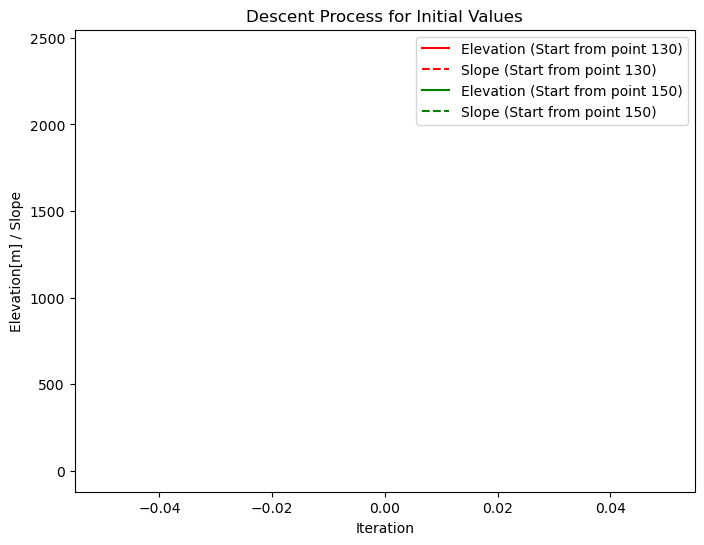

In [32]:
# Define the initial values to visualize
init_values = [130, 150]

# Plot the descent process for each initial value
plt.figure(figsize=(8, 6))
plt.title("Descent Process for Initial Values")
plt.xlabel("Iteration")
plt.ylabel("Elevation[m] / Slope")
colors = ['red', 'green']

for i, init in enumerate(init_values):
    points = go_down_mountain(data, 0.2, init)
    elevation = [data[point - 1, 3] for point in points]
    slope = [get_slope(data, point) for point in points]
    plt.plot(elevation, color=colors[i])
    plt.plot(slope, color=colors[i], linestyle='dashed')
    
plt.legend(["Elevation (Start from point 130)", "Slope (Start from point 130)",
            "Elevation (Start from point 150)", "Slope (Start from point 150)"])
plt.show()


In [4]:
# Define the alpha values to try
alphas = [0.1, 0.2, 0.5, 0.8]

# Plot the descent process for each alpha value
plt.figure(figsize=(8, 6))
plt.title("Descent Process for Different Alpha Values")
plt.xlabel("Iteration")
plt.ylabel("Elevation[m] / Slope")
colors = ['red', 'green', 'blue', 'orange']

for i, alpha in enumerate(alphas):
    points = go_down_mountain(data, alpha, 136)
    elevation = [data[point - 1, 3] for point in points]
    slope = [get_slope(data, point) for point in points]
    plt.plot(elevation, color=colors[i])
    plt.plot(slope, color=colors[i], linestyle='dashed')
    
plt.legend(["Elevation (Alpha=0.1)", "Slope (Alpha=0.1)",
            "Elevation (Alpha=0.2)", "Slope (Alpha=0.2)",
            "Elevation (Alpha=0.5)", "Slope (Alpha=0.5)",
            "Elevation (Alpha=0.8)", "Slope (Alpha=0.8)"])
plt.show()


NameError: name 'plt' is not defined

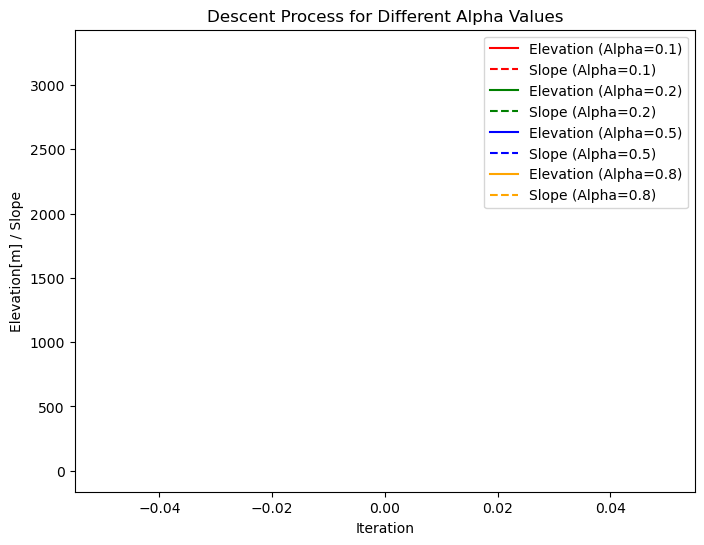

In [10]:
import matplotlib.pyplot as plt

def get_slope(data, point):
    """Returns the slope at the given point in the data array."""
    x1, y1 = data[point - 1, :2]
    x2, y2 = data[point, :2]
    return (y2 - y1) / (x2 - x1)

def go_down_mountain(data, alpha, start):
    """Performs a descent down the mountain starting from the given point using the given step size."""
    current = start
    path = [current]
    while True:
        slope = get_slope(data, current)
        if slope >= 0:
            break
        dx = alpha / (1 + slope**2)**0.5
        dy = slope * dx
        next_point = (data[current, 0] + dx, data[current, 1] + dy)
        dist = ((data[:, :2] - next_point)**2).sum(axis=1)
        current = np.argmin(dist)
        path.append(current)
    return path


# Define the alpha values to try
alphas = [0.1, 0.2, 0.5, 0.8]

# Plot the descent process for each alpha value
plt.figure(figsize=(8, 6))
plt.title("Descent Process for Different Alpha Values")
plt.xlabel("Iteration")
plt.ylabel("Elevation[m] / Slope")
colors = ['red', 'green', 'blue', 'orange']

for i, alpha in enumerate(alphas):
    points = go_down_mountain(data, alpha, 136)
    elevation = [data[point - 1, 3] for point in points]
    slope = [get_slope(data, point) for point in points]
    plt.plot(elevation, color=colors[i])
    plt.plot(slope, color=colors[i], linestyle='dashed')
    
plt.legend(["Elevation (Alpha=0.1)", "Slope (Alpha=0.1)",
            "Elevation (Alpha=0.2)", "Slope (Alpha=0.2)",
            "Elevation (Alpha=0.5)", "Slope (Alpha=0.5)",
            "Elevation (Alpha=0.8)", "Slope (Alpha=0.8)"])
plt.show()


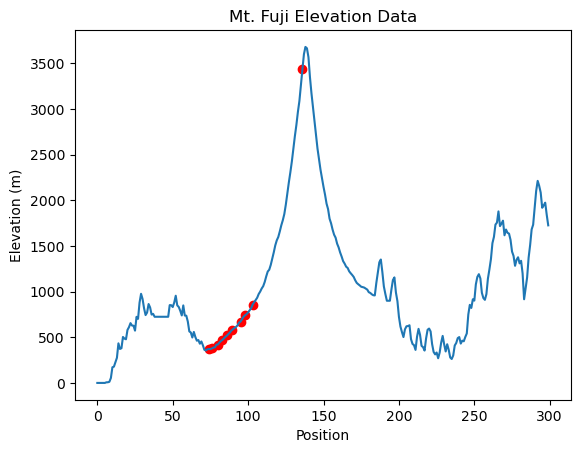

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = np.loadtxt('mtfuji_data.csv', delimiter=',', skiprows=1)

# Extract the elevation data
elevation = data[:, 3]

def calculate_slope(position, elevation, current_point):
    # Calculate the slope of the current point
    next_point = current_point + 1
    if next_point == len(position):
        next_point = current_point
    slope = (elevation[next_point] - elevation[current_point]) / (position[next_point] - position[current_point])
    return slope

def get_destination_point(current_point, alpha, slope):
    # Calculate the destination point
    destination_point = current_point - alpha * slope
    destination_point = round(destination_point)
    if destination_point < 0 or destination_point >= len(elevation):
        destination_point = current_point
    return destination_point

def descend_mountain(start_point, alpha=0.2):
    # Start from the given point and descend the mountain
    current_point = start_point
    points = [current_point]
    while True:
        # Calculate the slope and the destination point
        slope = calculate_slope(data[:, 0], elevation, current_point)
        destination_point = get_destination_point(current_point, alpha, slope)

        # Check if the destination point is the same as the current point
        if destination_point == current_point:
            break

        # Update the current point and add it to the list of points
        current_point = destination_point
        points.append(current_point)

    return points

# Descend the mountain from point 136 and plot the result
points = descend_mountain(136)
plt.plot(data[:, 0], elevation)
plt.scatter(data[points, 0], elevation[points], c='r')
plt.title('Mt. Fuji Elevation Data')
plt.xlabel('Position')
plt.ylabel('Elevation (m)')
plt.show()
